<a href="https://colab.research.google.com/github/PrathmeshPawarb/Data-Science-Machine-Learning-Assignments/blob/main/simple_regression_assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

# Delivery Time

In [ ]:
time= pd.read_csv('/content/delivery_time.csv')
time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [ ]:
time.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [ ]:
#renamed the columns
time.rename(columns={'Delivery Time':'d','Sorting Time':'s'}, inplace=True)

In [ ]:
time.head()

,d,s
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
# model building for simple regression
md=smf.ols("d~s", data=time).fit()
md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        09:25:35   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
s              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Sorting Time')

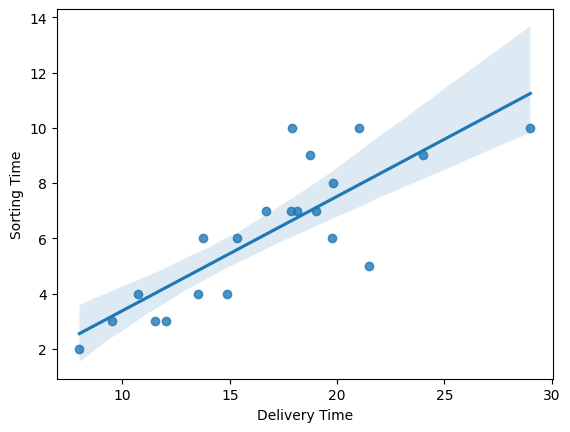

In [ ]:
sns.regplot(x='d',y='s', data=time)
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')

In [ ]:
# predicting delivery time using sorting time

newdata= pd.Series([2,4,6,8,10,12])
sort_time = pd.DataFrame(newdata, columns=['s'])
sort_time

,s
0,2
1,4
2,6
3,8
4,10
5,12


In [ ]:
md.predict(sort_time)

0     9.880774
1    13.178814
2    16.476853
3    19.774893
4    23.072933
5    26.370973
dtype: float64

# Salary data

In [ ]:
df1= pd.read_csv("/content/Salary_Data.csv")
df1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
md1 = smf.ols("Salary~YearsExperience", data=df1).fit()

In [ ]:
md1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        09:25:36   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='YearsExperience', ylabel='Salary'>

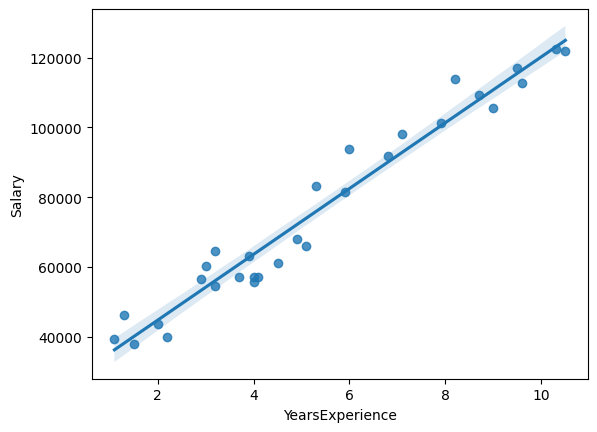

In [ ]:
sns.regplot(x='YearsExperience', y='Salary', data=df1)

In [ ]:
md1.pvalues  #pvalue far small then 0.05 alternate hypotheis accepeted ()

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64